# Part 1: Low Level Vision (image > image)
> ## Week 1 ( Basic Image Processing Techniques)¶
>> **01-Luminance (Brightness, contrast, gamma, histogram equalization)**

This is the curriculum for "Learn Computer Vision" by Siraj Raval on Youtube
https://github.com/llSourcell/Learn_Computer_Vision

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Adjusting Brightness and Contrast of an image

### 1.a numpy implementation

In [2]:
def change_brightness_contrast_np(img, contrast=1.0, bright=0 ):
    """ 
    reads the input image and transforms it (linear transformation)
    Do the operation new_image(i,j) = alpha*image(i,j) + beta
    """
    
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_new = np.zeros_like(img)
    
    # take the height(row), width(column) and #channels of image
    height, width, channels = img.shape
    
    for h in range(height):
        for w in range(width):
            for c in range(channels):
                img_new[h,w,c] = np.clip(contrast*img[h,w,c] + bright, 0, 255)
    

    f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
    ax1.imshow(img)
    ax2.imshow(img_new)

Wall time: 33.8 s


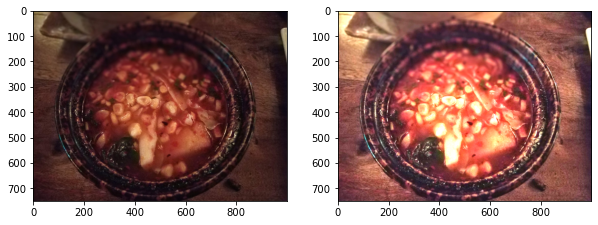

In [3]:
%%time
change_brightness_contrast_np("dark1.jpg", contrast=2.0, bright=10)

### 1.b openCV implementation

In [4]:
def change_brightness_contrast_cv(img, alpha=1.0, beta=0):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_new = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
    ax1.imshow(img)
    ax2.imshow(img_new)

Wall time: 38 ms


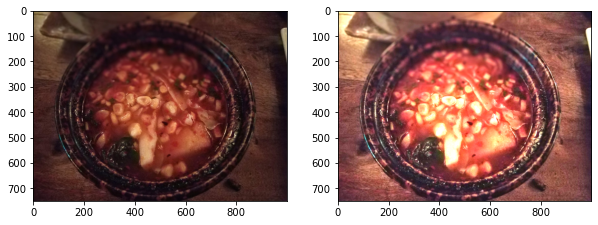

In [5]:
%%time
change_brightness_contrast_cv("dark1.jpg", alpha=2.0, beta=10)

These `for loops` used in the first method are very slow for real world.

we can simply use opencv's method: **`cv2.convertScaleAbs()`**

## 2. gamma correction

In [6]:
def gamma_correction(img, gamma=0):
    """ 
    reads the input image and transforms it (non-linear transformation)
    Do the operation new_image = power(img / 255.0, gamma) * 255.0
    np.clip is used to keep pixel value between 0 and 255
    A look-up table is used to improve the performance of the computation 
    as only 256 values needs to be calculated once.
    """
    
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    img_new = cv2.LUT(img, lookUpTable)
    

    f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
    ax1.imshow(img)
    ax2.imshow(img_new)

Wall time: 43 ms


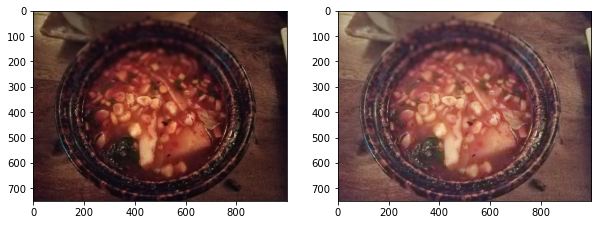

In [7]:
%%time
gamma_correction("dark1.jpg", 0.6)

## 3. histograms

### 3.a numpy implementation

In [8]:
def draw_histogram_np(img):
    """ 
    reads the input image and draws histogram.
    """
    # load it as grayscale
    img = cv2.imread(img, 0)
    # np.histogram(image, bins, range)
    hist,bins = np.histogram(img.ravel(), 256, [0,255])
    # print(hist.shape)
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    ax1.imshow(img)
    ax2.plot(hist)

Wall time: 29 ms


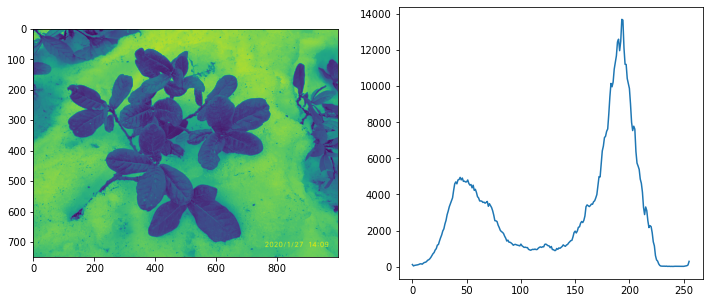

In [9]:
%%time
draw_histogram_np("img3.jpg")

### 3.b opencv implementation

In [10]:
def draw_histogram_cv2(img):
    """ 
    reads the input image and draws histogram.
    """
    # load it as grayscale
    img = cv2.imread(img, 0)
    # calcHist([image], [channels], Mask, histSize/binSize, range_of_pixels)
    hist = cv2.calcHist([img], [0], None, [256],[0,255])
    #print(hist.shape)
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
    ax1.imshow(img)
    ax2.plot(hist)

Wall time: 21 ms


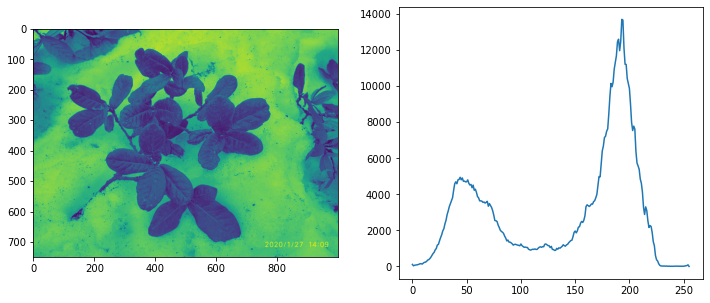

In [11]:
%%time
draw_histogram_cv2("img3.jpg")

## 4. histogram equalization


### 4.a numpy implementation

In [12]:
def histogram_equalization_np(img):
    """ 
    reads the input image,draws histogram and perform equalization.
    """
    # load it as grayscale
    img = cv2.imread(img, 0)
    # np.histogram(image, bins, range)
    hist,bins = np.histogram(img.ravel(), 256, [0,255])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype(np.int8)
    img2 = cdf[img]
    
    hist2, bins = np.histogram(img2.ravel(), 256, [0,255])
    cdf2 = hist2.cumsum()
    cdf_normalized2 = cdf2 * hist2.max() / cdf2.max()
    
    f, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(15,10))
    ax1.imshow(img)
    ax2.plot(cdf_normalized, color='r')
    ax2.plot(hist)    
    ax2.legend(['cdf', 'histogram'], loc='best')
    
    ax3.imshow(img2)
    ax4.plot(cdf_normalized2, color='r')
    ax4.plot(hist2)
    ax4.legend(['cdf2', 'histogram2'], loc='best')
    
    plt.show()

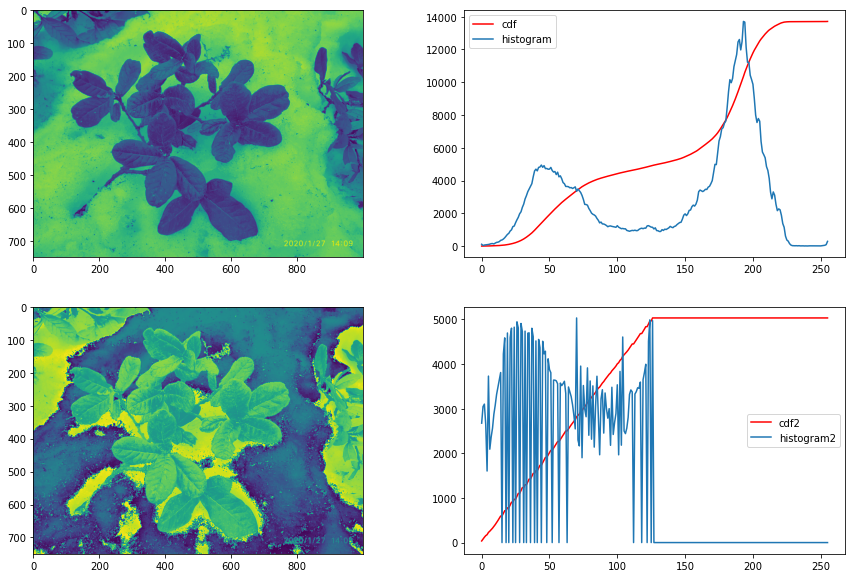

Wall time: 419 ms


In [13]:
%%time
histogram_equalization_np("img3.jpg")

### 4.b opencv implementation

In [14]:
def histogram_equalization_cv2(img):
    """ 
    reads the input image,draws histogram and perform equalization.
    """
    # load it as grayscale
    img = cv2.imread(img, 0)
    equ = cv2.equalizeHist(img)
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
    ax1.imshow(img)
    ax2.imshow(equ)

Wall time: 24 ms


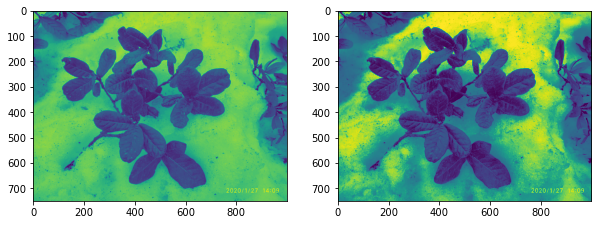

In [15]:
%%time
histogram_equalization_cv2("img3.jpg")

## 5. CLAHE - Contrast Limited Adaptive Histogram Equalization

In [16]:
def draw_clahe(img):
    # load it as grayscale
    img = cv2.imread(img, 0)
    
    # create a clahe object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img)
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
    ax1.imshow(img)
    ax2.imshow(img_clahe)

Wall time: 22 ms


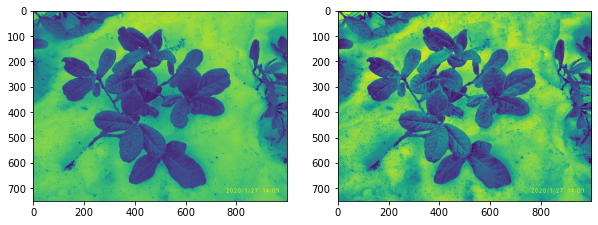

In [17]:
%%time
draw_clahe("img3.jpg")

### references:

- https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
- https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html
- https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
- https://en.wikipedia.org/wiki/Histogram_equalization
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html